# Analyzing Data from Multiple Files

## Questions

- How can I do the same operations on many different files?

## Objectives

- Use a library function to get a list of filenames that match a wildcard pattern.

- Write a for loop to process multiple files.

When running the simulation, we ran four other simulations with different materials for the film blocking the LED light. In order to view this data, and how it compares to our base simulation, we need to use a library with an usual name: `glob`.


In [1]:
import glob

The `glob` library contains a function, also called `glob`, that finds files and directories whose names match a pattern. We provide those patterns as strings: the character `*` matches zero or more characters, while `?` matches any one character. We can use this to get the names of all the CSV files in the current directory:

In [2]:
print(glob.glob('simulation*.txt'))

['simulation01.txt', 'simulation02.txt', 'simulation03.txt', 'simulation04.txt', 'simulation05.txt']


As these examples show, `glob.glob`’s result is a list of file and directory paths in arbitrary order. This means we can loop over it to do something with each filename in turn. In our case, the “something” we want to do is take the cross section of each dataset and compare the resulting line plots.

simulation01.txt
simulation02.txt
simulation03.txt
simulation04.txt
simulation05.txt


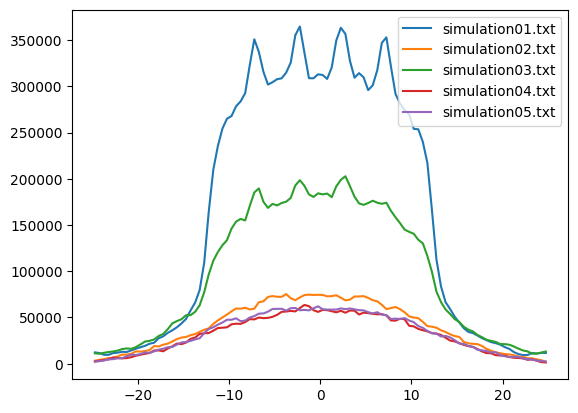

In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt



filenames = glob.glob('simulation*.txt')
for filename in filenames:
    print(filename)

    sim = np.loadtxt(fname=filename, skiprows=52)
    
    x = sim[:, 0]
    y = sim[:, 1]
    rad = sim[:, 2]

    # Find the closest y-value to 0
    smallest_y = np.amin(abs(y))
    x_cross_section = x[y==smallest_y]
    luminance_cross_section = rad[y==smallest_y]

    # by adding a 'label' argument we can create a legend!
    plt.plot(x_cross_section, luminance_cross_section, label=filename)

# If we add labels to our plot, we have to call this command to draw the legend on the graph!
plt.legend()


Our other data sets have drastically different peak values of luminance, meaning our first dataset is the best to be compared directly to the experimental data. 


# Further Plotting with Matplotlib

But the truth is we can improve this graph significantly. The axes need to be labelled, and if you try to run the above code in a pure python script, it won't work. What gives? 

This is because jupyter notebooks integrate seamlessly with matplotlib for simple plots. There are a few extra steps we need to employ to recreate the figure in a pure python script. Additionally, if we want more complicated plotting features (e.g. subplots) we need to include some extra steps.

The "standard" recipe for creating a matplotlib plot is as follows.

1. Create a `figure` object (like getting a piece of paper on which we are going to draw)
2. Add `axes`/`subplots` to the `figure` (This is equivalent to drawing boxes/axes on paper, in which we will plot data)
3. Plot data on the axes 
4. Label the axes 

To demonstrate this lets construct a plot below, with the scatter from each simulation on the top and the line plot on the bottom.

simulation01.txt
simulation02.txt
simulation03.txt
simulation04.txt
simulation05.txt


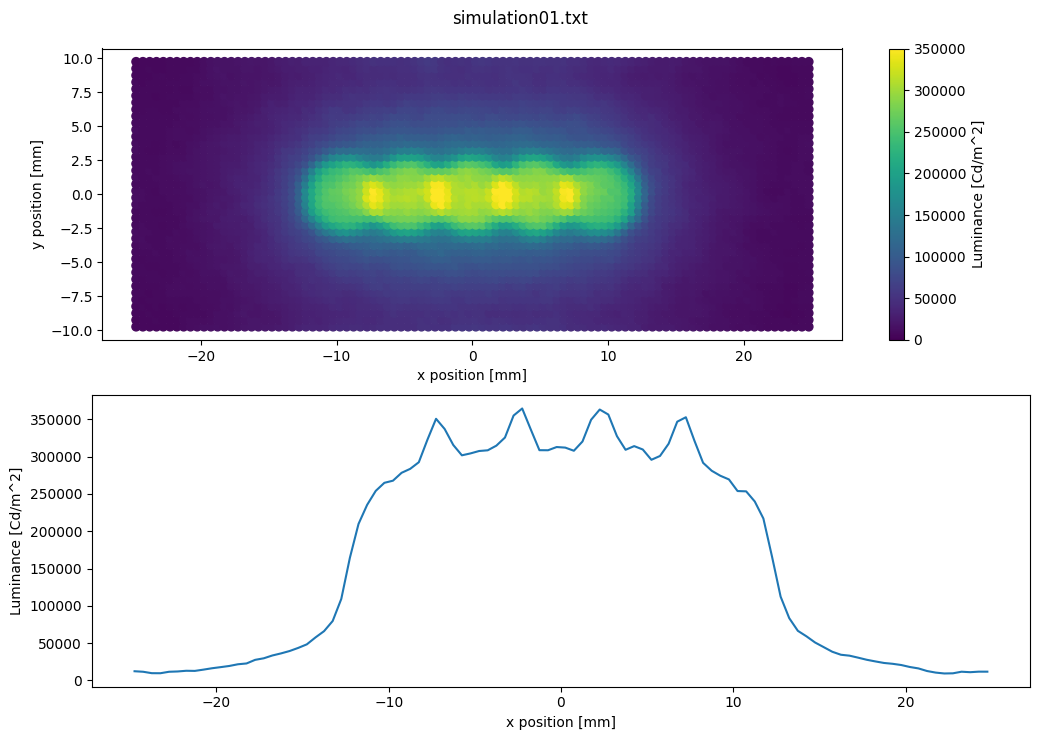

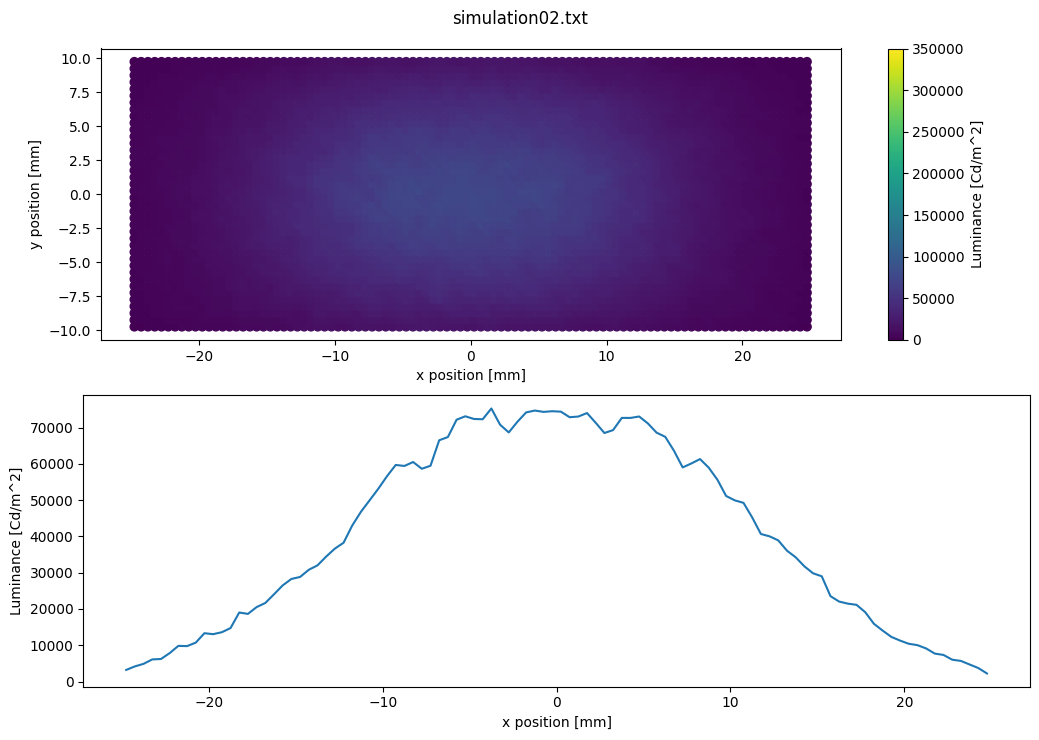

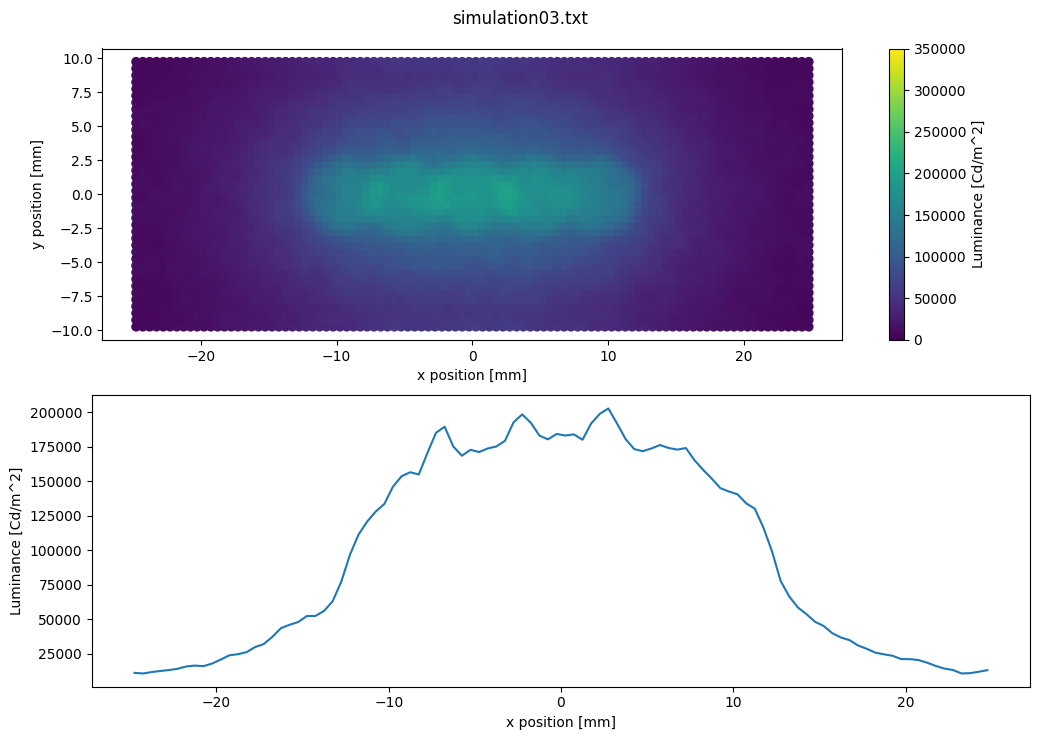

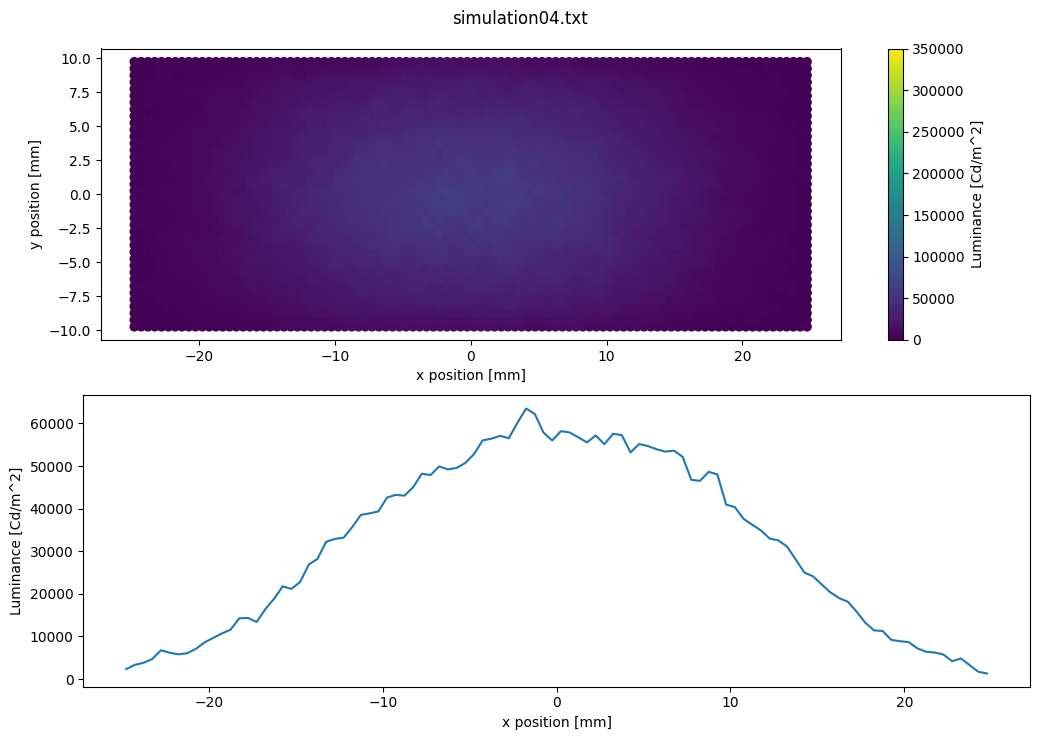

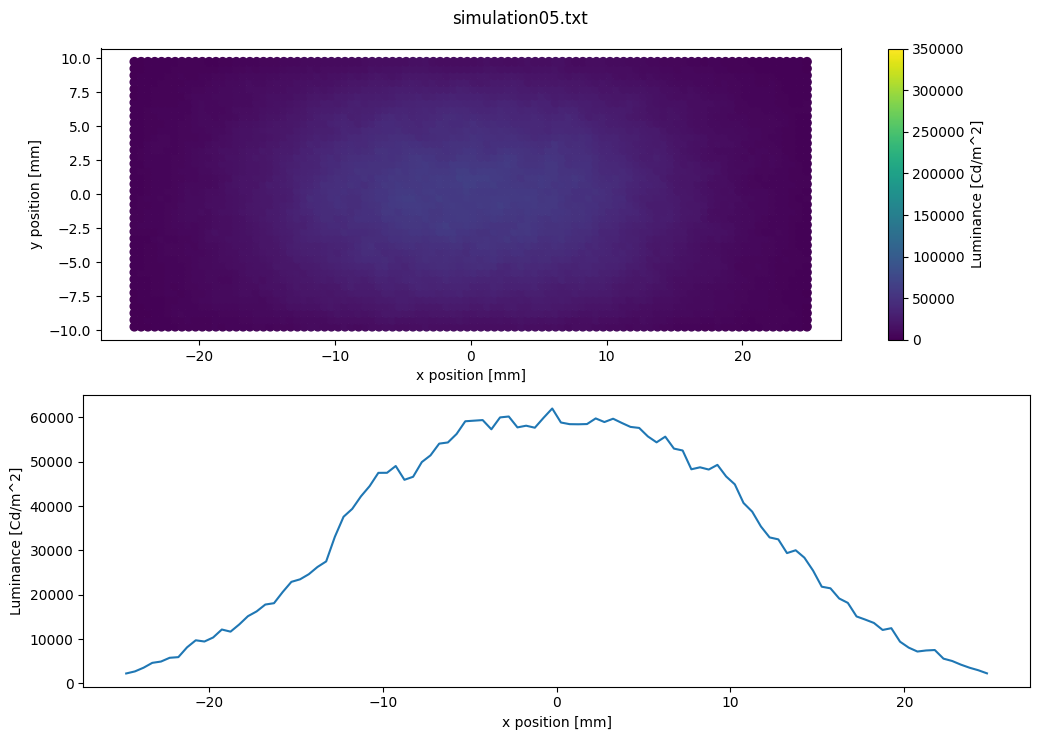

In [4]:

filenames = sorted(glob.glob('simulation*.txt'))
for filename in filenames:
    print(filename)

    sim = np.loadtxt(fname=filename, skiprows=52)
    x = sim[:, 0]
    y = sim[:, 1]
    rad = sim[:, 2]
    # Find the closest y-value to 0
    smallest_y = np.amin(abs(y))
    x_cross_section = x[y==smallest_y]
    luminance_cross_section = rad[y==smallest_y]

    
    # figsize lets use say how big the figure (our canvas) should be in inches (horizontal by vertical)
    fig = plt.figure(figsize=(10.5, 7.5))

    # fig.add_subplot(211)? What? This tells matplotlib how many plots and which one this is. 
    # 212 = plots will be on a 2 x 1 grid and this is plot 2
    # 335 = plots will be on a 3 x 3 grid and this is plot 5
    # plot order is left -> right, then top -> bottom.
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    
    # vmin and vmax set the min and max value for the color
    sc = ax1.scatter(x, y, c=rad, vmin=0, vmax=350000)
    # let's create a colorbar this time
    cb = fig.colorbar(sc, ax=ax1)
    
    ax2.plot(x_cross_section, luminance_cross_section)
    
    # set the labels for each plot starting with ax1
    ax1.set_ylabel('y position [mm]')
    ax1.set_xlabel('x position [mm]')
    
    # then ax2
    ax2.set_ylabel('Luminance [Cd/m^2]')
    ax2.set_xlabel('x position [mm]')
    
    # then the new colorbar we've made
    cb.set_label('Luminance [Cd/m^2]')
    
    # Finally, we can set the title on each ax individually, but we can also set it on the whole figure
    # "suptitle" = "super title"
    fig.suptitle(filename)
    
    # the plot on ax1 should have equal spacing between points on the x and y-axes because it is physical space
    # So we set the aspect ratio of the plot to 1, to achieve this
    ax1.set_aspect(1)
    fig.tight_layout()
    
    # Finally we can save the figure as the filename but with .png instead of .txt
    fig.savefig(filename[:-4]+'_remake.png')



This cell contains a lot of new code! Luckily, there are very few new concepts, and this is just a set of functions to remember (not all of which you will need). Here is the summary of the new commands that have been included in the order they appear.

- `fig = plt.figure()` This creates the figure object

    - `plt.figure(figsize=(x, y))` this sets the figure size to be `x` inches by `y` inches

- `fig.add_subplot(211)` Add a new axes to the figure. 
    - The figure will be **2** rows by **1** column and this is plot **#1**

- `sc = ax1.scatter()` Plotting functions return plot objects which we can store in variables and use later

    - `vmin=0, vmax=350000` this sets the color limits

- `cb = fig.colorbar(sc, ax=ax1)` We can add a colorbar to the plot be specifying the plot object and the axes

- `<object>.set_label()` We can use the various `set_label` methods to add labels to our axes and colorbar

- `fig.suptitle()` The suptitle command lets us set the "super" title for the figure

- `ax1.set_aspect()` This lets us set the aspect ratio for the figure. An aspect ratio of 1 means that changes in data in x equal data changes in y. It does _not_ change the shape of the image, as the term means in photography.

- `fig.savefig()` saves the figure as an image file

# Exercise 1* - glob dot glob

1. Use `glob.glob` to print all the `.ipynb` files in the current working directory (which should contain all the lessons!) 

2. What is the shortest string pattern that only fetches the `.ipynb` files that start with "0"?

In [6]:
# Enter your solution here
notebook_files = glob.glob('*.ipynb')
for file in notebook_files:
    print(file)

01Fundamentals.ipynb
02AnalyzingRadianceData.ipynb
03RepeatingActionsWithLoops.ipynb
04StoringMultipleValuesInLists.ipynb
05MakingChoices.ipynb
06AnalyzingDataFromMultipleFiles.ipynb
07CreatingFunctions.ipynb
08DefensiveProgramming.ipynb
09Debugging.ipynb
10CommandLinePrograms.ipynb


# Exercise 2* - Plotting Differences

Plot the difference between the radiances found in simulations 02 and 04 at the smallest y cross section.

1. Load both from csv
2. Extract the radiance cross sections along the same location
3. Take the difference between the two arrays and plot them

> **HINT:** You should approach this exercise (and the following ones in this lesson) in the same way. Try a "quick and dirty" approach. If you only had a couple of minutes to do each one and you had to get it working in that time what would you do? You should copy/paste as much as you can; use the code from earlier in the lesson! Don't worry about code duplication or doing it "well". Get something that works written as fast as possible. It is possible to complete the exercise in under 30s or so with this approach!

[-24.75 -24.25 -23.75 ...  23.75  24.25  24.75]


Text(0.5, 1.0, 'Simulation2 vs Simulation 4 - Differences')

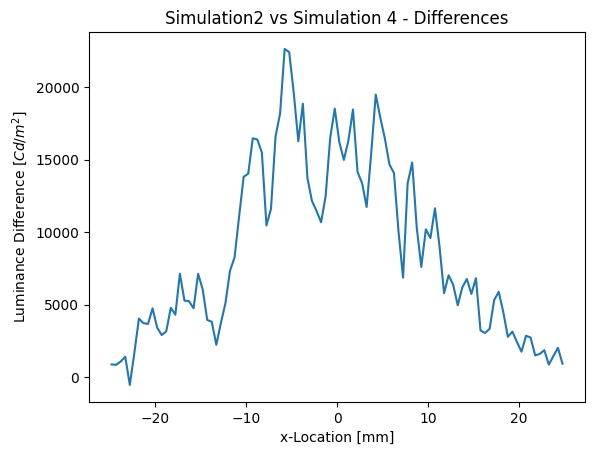

In [15]:
# Enter your solution here
sim2 = np.loadtxt('simulation02.txt', skiprows=52)
sim4 = np.loadtxt('simulation04.txt', skiprows=52)
x = sim2[:, 0]
y2 = sim2[:, 1]
rad2 = sim2[:, 2]
y2_min = np.amin(abs(y2))
x_cross = x[y2 == y2_min]
rad2 = rad2[y2 == y2_min]
y4 = sim4[:, 1]
rad4 = sim4[:, 2]
y4_min = np.amin(abs(y4))
rad4 = rad4[y4 == y4_min]
diff = rad2 - rad4
print(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_cross, diff)
ax.set_ylabel('Luminance Difference [$Cd/m^2$]')
ax.set_xlabel('x-Location [mm]')
ax.set_title('Simulation2 vs Simulation 4 - Differences')

# Exercise 3 - Generate Composite Statistics

We can easily see that the first simulation dataset matches the experiment most closely, but we should check the other datasets as well. For each dataset use boolean indexing to find the average luminance (the luminance between -10 mm <= x <= +10 mm) in the cross sections and calculate the percentage difference with the equivalent experimental mean luminance over the same region.

In [5]:
import glob
import numpy as np


filenames = glob.glob('simulation*.txt')
experiment = numpy.loadtxt(fname='experiment01.csv', delimiter=',')
# Enter your solution here
# Note: percentage difference should be = (difference between the values/experimental value)*100
exp_x = experiment[:, 0]
exp_y = experiment[:, 1]

exp_x_bool = np.logical_and(exp_x >= -10, exp_x <= 10)
exp_mean_luminance = np.mean(exp_y[exp_x_bool == True])
exp_full_mean = np.mean(exp_y)
print(f'Experimental mean luminance is {exp_mean_luminance:.2f} [Cd/m^2]')
print(f'Experimental mean luminance of the full dataset is {exp_full_mean:.2f} [Cd/m^2]')

for file in filenames:
    file_data = numpy.loadtxt(fname=file, skiprows=52)
    x = file_data[:, 0]
    y = file_data[:, 1]
    rad = file_data[:, 2]
    y_min = np.amin(abs(y))
    x_cros = x[y==y_min]
    x_cros_bool = np.logical_and(x_cros >= -10, x_cros <= 10)
    rad_cross = rad[y == y_min]
    rad_mean = np.mean(rad_cross[x_cros_bool == True])
    print('The mean luminance value in the cross section for the x-axis interval [10, -10] mm is:')
    print(f'File: {file}, rad = {100 * rad_mean / exp_mean_luminance :.2f} %')

Experimental mean luminance is 305431.90 [Cd/m^2]
Experimental mean luminance of the full dataset is 161012.21 [Cd/m^2]
The mean luminance value in the cross section for the x-axis interval [10, -10] mm is:
File: simulation01.txt, rad = 103.32 %
The mean luminance value in the cross section for the x-axis interval [10, -10] mm is:
File: simulation02.txt, rad = 22.11 %
The mean luminance value in the cross section for the x-axis interval [10, -10] mm is:
File: simulation03.txt, rad = 57.27 %
The mean luminance value in the cross section for the x-axis interval [10, -10] mm is:
File: simulation04.txt, rad = 17.28 %
The mean luminance value in the cross section for the x-axis interval [10, -10] mm is:
File: simulation05.txt, rad = 18.06 %


# Exercise 4 - Subplots

a) Plot all the scatter plots from the lesson on a single figure, in the shape 3 x 2. You don't need to create the 6th, unusued, axes.

b) Plot all the line plots from the lesson on another single figure, this time as a single column of 5 plots.

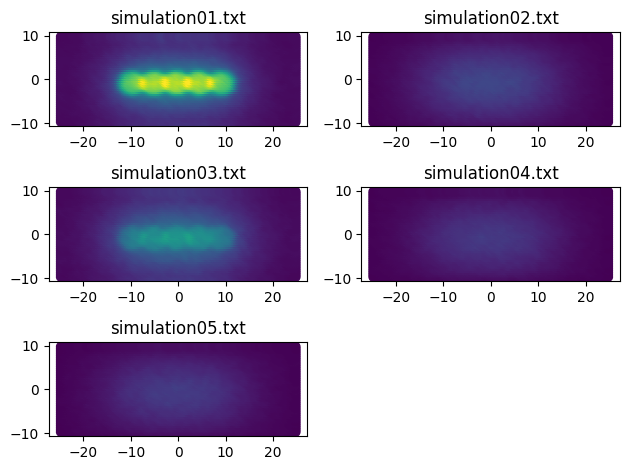

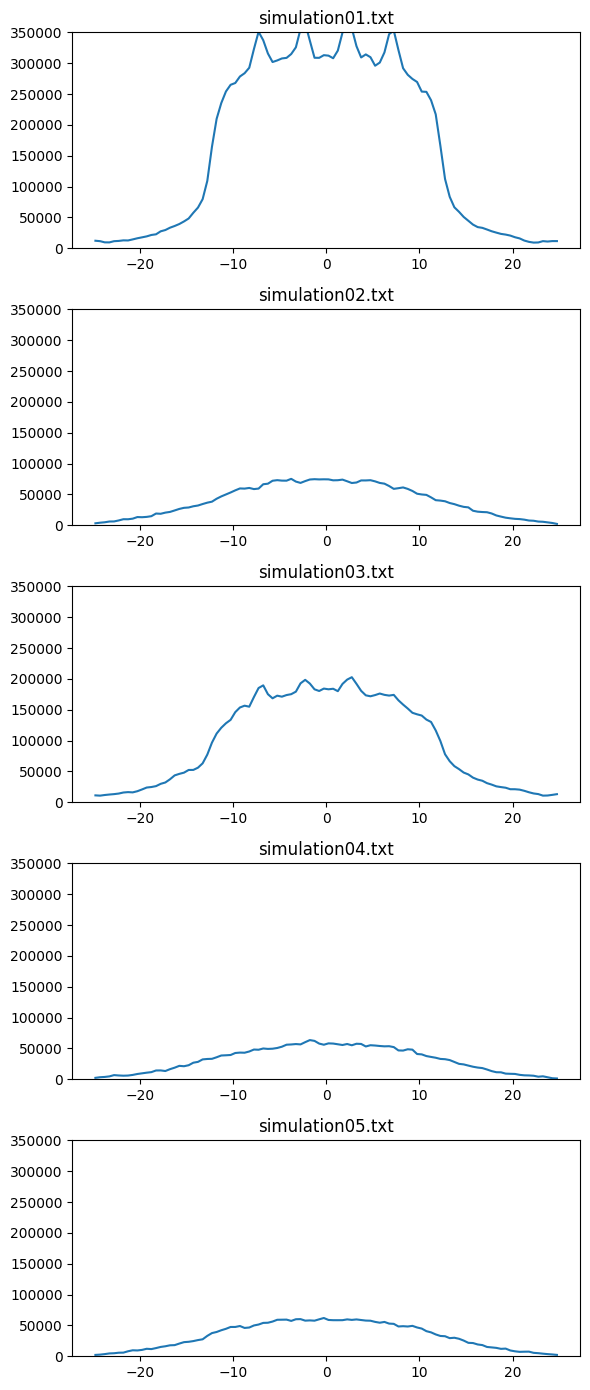

In [35]:
# Enter your solution here
import glob
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
plot_counter = 1

filenames = sorted(glob.glob('*.txt'))

for file in filenames:
    file_data = np.loadtxt(fname=file, skiprows=52)
    x = file_data[:, 0]
    y = file_data[:, 1]
    z = file_data[:, 2]

    ax = fig.add_subplot(3, 2, plot_counter)
    sc = ax.scatter(x, y, c=z, vmin=0, vmax=350000)
    
    ax.set_title(file)
    
    plot_counter += 1
    
fig.tight_layout()
fig.savefig('scatter_plots.png')


fig1 = plt.figure(figsize=(6, 14))
plot_counter = 1

filenames = sorted(glob.glob('*.txt'))

for file in filenames:
    file_data = np.loadtxt(fname=file, skiprows=52)
    x = file_data[:, 0]
    y = file_data[:, 1]
    z = file_data[:, 2]
    
    y_min = np.amin(abs(y))
    x_cros = x[y == y_min]
    rad = z[y == y_min]

    ax = fig1.add_subplot(5, 1, plot_counter)
    ax.set_ylim(0, 350000)
    pl = ax.plot(x_cros, rad)
    
    ax.set_title(file)
    
    plot_counter += 1

fig1.tight_layout()
fig1.savefig('all_plots.png')

# Key Points

- Use `glob.glob(pattern)` to create a list of files whose names match a pattern.

- Use `*` in a pattern to match zero or more characters, and `?` to match any single character.

This work is derived from work that is Copyright © [Software Carpentry](http://software-carpentry.org/), under the CC-by [license](https://creativecommons.org/licenses/by/4.0/). The text has been paraphrased partially in some locations, with some additional exercises and images included, but the vast majority of the content is derived from the Software Carpentry lesson.